# 공공데이터

## 1. 사전준비

#### 000 모듈 불러오기

- 다음의 코드를 실행하세요.

-------
<span style="font-weight:normal; color:#303F9F;">In</span>
```python
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
```


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

#### 데이터 불러오기

- 다음의 코드를 실행해 필요한 데이터를 불러오세요.

In [10]:
wifidata = pd.read_csv('공공데이터\wifidata.csv', encoding='cp949')
carclean = pd.read_csv('공공데이터\carwash.csv', encoding='cp949')
ftour = pd.read_csv('공공데이터/ftour-2.csv', encoding='cp949')

## 2. 서울시 공공와이파이 분석

#### 001 각 구별 공공 와이파이 설치현황 분석

- 다음 예시와 같이 각 구별로 공공 와이파이의 설치 현황을 분석하는 그래프를 그리세요.
- 사용된 데이터는 ```wifidata```의 '구명' 입니다.
- 사용된 컬러 팔레트는 Paired 입니다.
- 타이틀의 fontsize 는 25, pad는 20 입니다.
- 각 축의 label 의 fontsize는 20 입니다.
- 각 틱의 labelsize 는 10, rotation은 45 입니다.

-------
<span style="font-weight:normal; color:#303F9F;">In</span>
```python
plt.figure(figsize=(15,9))
# 주석을 지우고 이곳에 코드를 작성하세요.

for temp in cp.patches:
    cp.annotate(temp.get_height(),
                (temp.get_x()+temp.get_width()/2,temp.get_height()),
                ha='center',va='bottom',fontsize=10)
plt.show()
```
-------
<span style="font-weight:normal; color:orange;">Print</span>
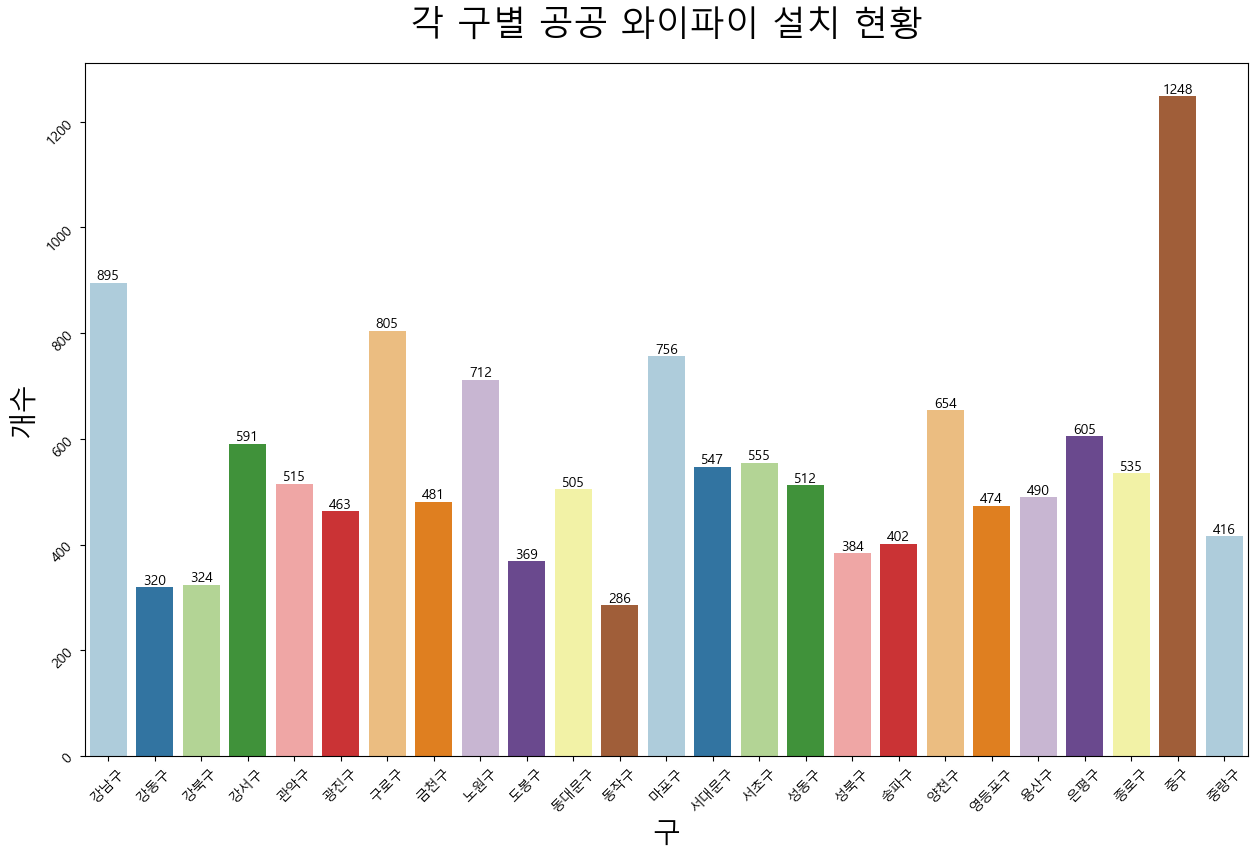

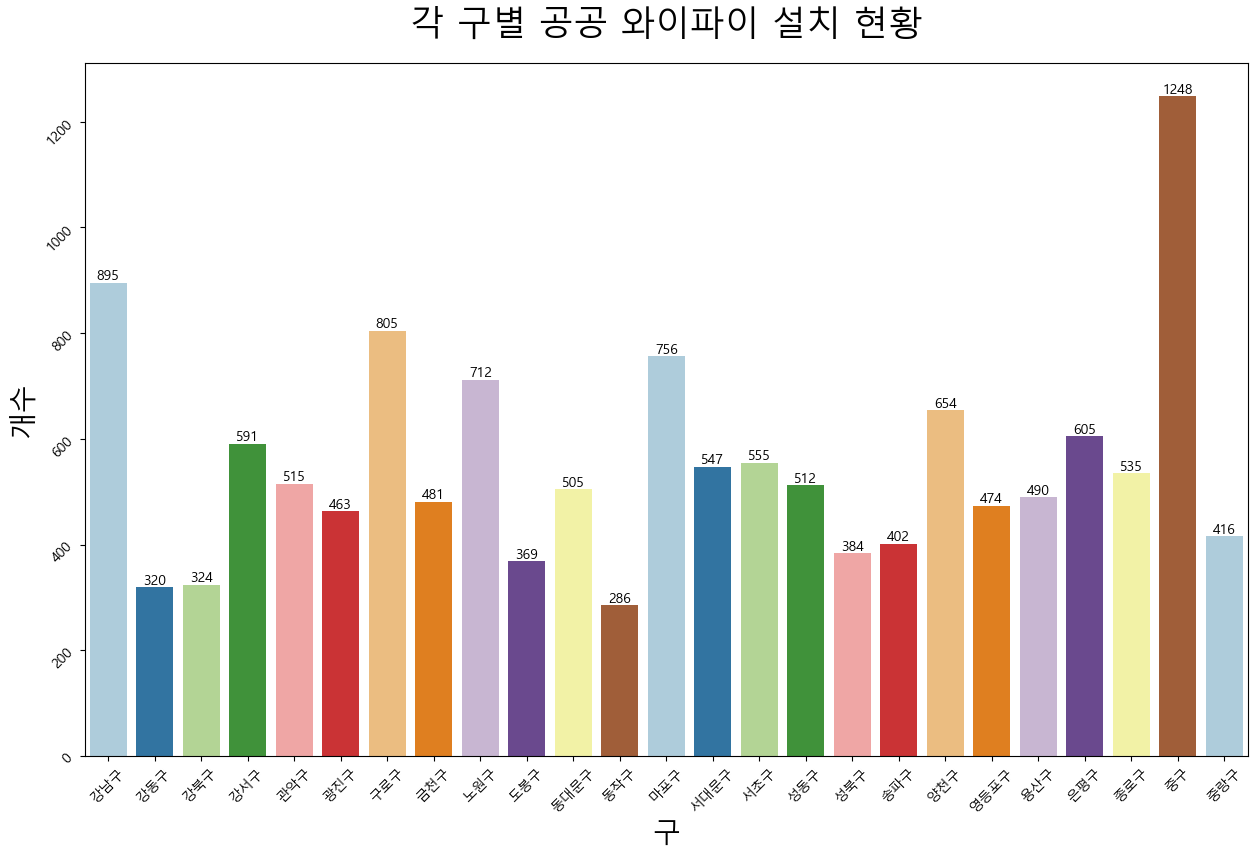

In [43]:
plt.figure(figsize=(15,9))
cp = sns.countplot(x='구명', data=wifidata, palette='Paired')
cp.set_xlabel('구',fontsize=20)
cp.set_ylabel('개수',fontsize=20)
cp.set_title('각 구별 공공 와이파이 설치 현황', fontsize=25, pad=20)
cp.tick_params(labelsize=10,rotation=45) 

for temp in cp.patches:
    cp.annotate(temp.get_height(),
                (temp.get_x()+temp.get_width()/2,temp.get_height()),
                ha='center',va='bottom',fontsize=10)
plt.show()

#### 002 세차장 데이터 분석

- 다음 예시와 같이 시·도별 세차장 현황을 분석하세요.(어느 시·도에 가장 많은 세차장이 있는지 확인)
- 가장 많은 세차장이 있는 시·도의 시·군·구 세차장 개수를 파악하세요.

-------
<span style="font-weight:normal; color:#303F9F;">In</span>
```python
# 주석을 지우고 이곳에 코드를 작성하세요.

plt.show()
```
-------
<span style="font-weight:normal; color:orange;">Print</span>
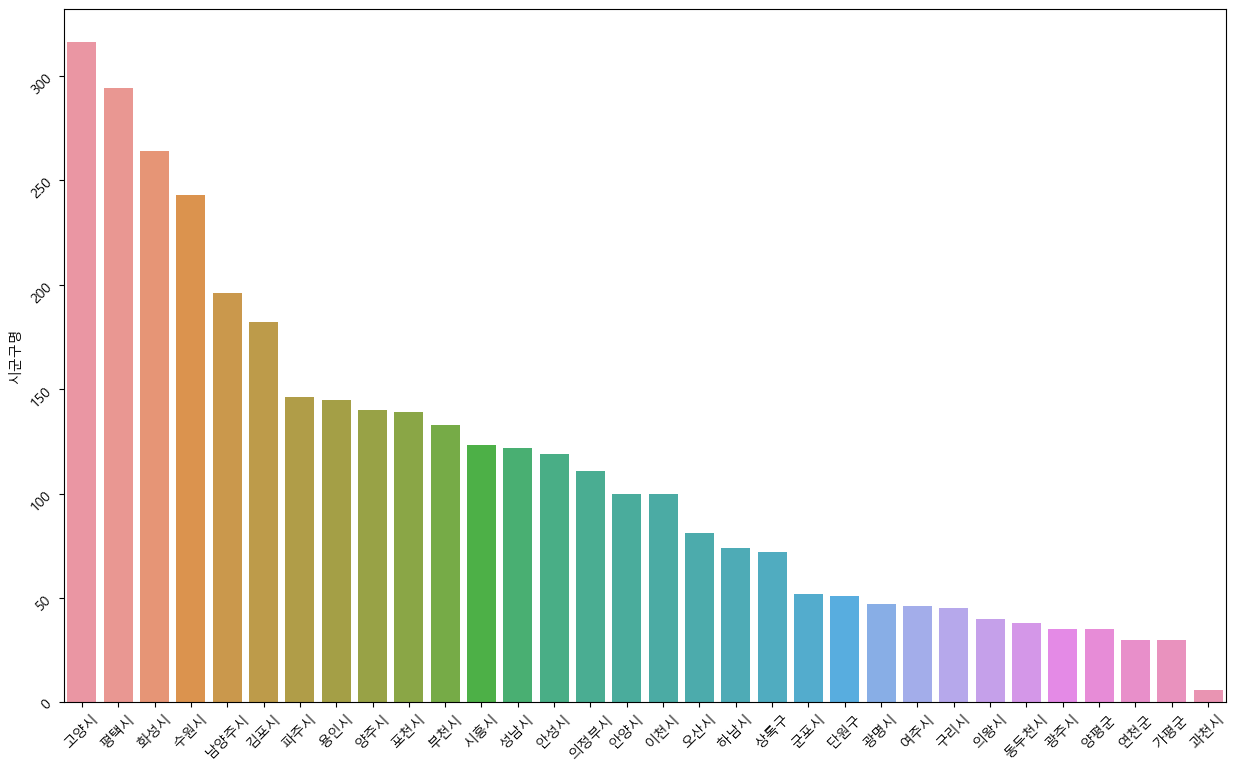

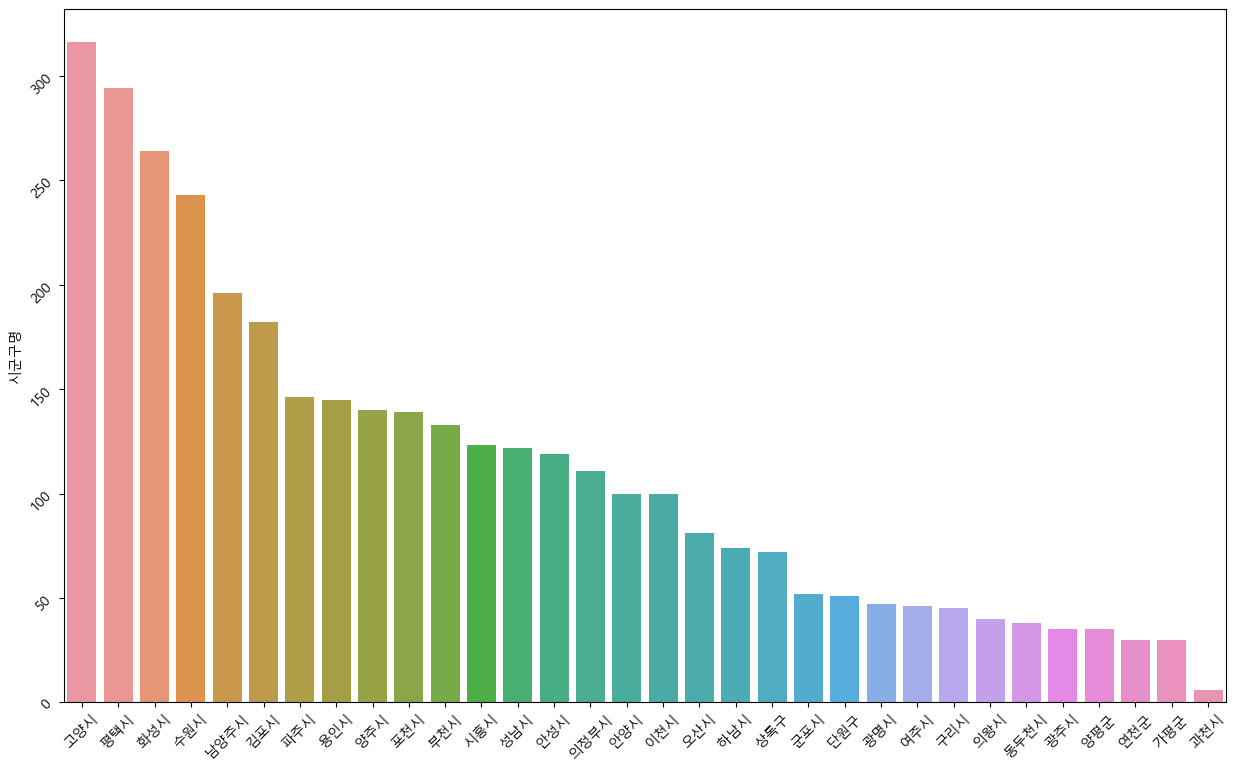

In [79]:
result = carclean['시도명'].value_counts()
result = pd.DataFrame(result)
result

no1 = result.index[0]
no1

plt.figure(figsize=(15,9))
cdata = carclean.loc[carclean['시도명']==no1, '시군구명']
cdata = pd.DataFrame(cdata)
cdata = cdata['시군구명'].value_counts()
cdata = pd.DataFrame(cdata)
bp = sns.barplot(cdata.index, cdata.시군구명)
bp.tick_params(labelsize=10,rotation=45) 
plt.show()

#### 003 거주 국가별 동반 유형 분석

- pandas 의 pivot_table 을 사용하여 다음 예시와 같이 거주 국가별로 동반 유형을 분석하는 DataFrame 을 만드세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
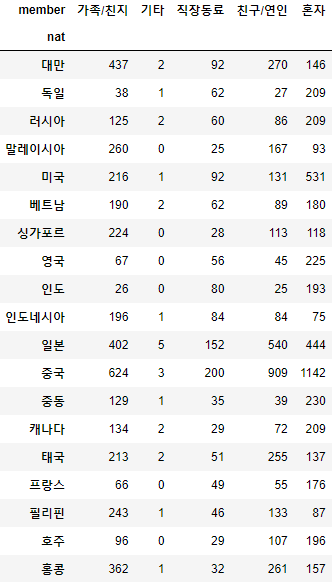

In [100]:
ftour.pivot_table(index='nat', columns='member', values='id', aggfunc="count", fill_value=0)

member,가족/친지,기타,직장동료,친구/연인,혼자
nat,,,,,
대만,437,2,92,270,146
독일,38,1,62,27,209
러시아,125,2,60,86,209
말레이시아,260,0,25,167,93
미국,216,1,92,131,531
베트남,190,2,62,89,180
싱가포르,224,0,28,113,118
영국,67,0,56,45,225
인도,26,0,80,25,193


#### 004 거주 국가별 만족한 활동(bestact) 관계 분석

- pandas 의 pivot_table 을 사용하여 다음 예시와 같이 거주 국가별로 가장 만족한 활동(bestact)에 대한 관계를 분석하는 DataFrame 을 만드세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
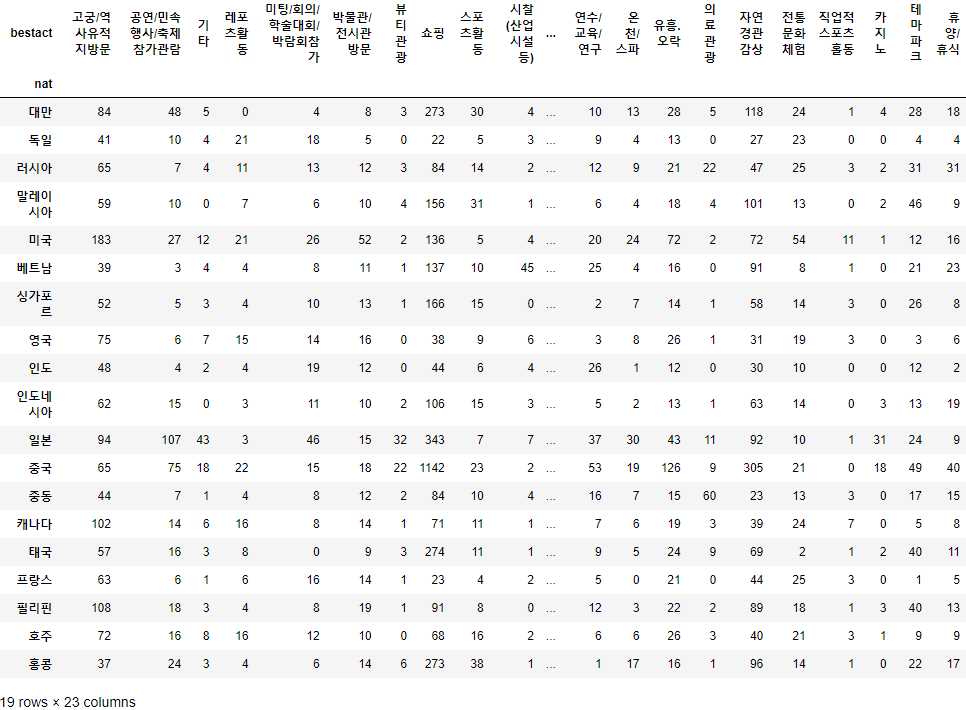

In [101]:
ftour.pivot_table(index='nat',columns='bestact', values='id', aggfunc="count", fill_value=0)

bestact,고궁/역사유적지방문,공연/민속행사/축제참가관람,기타,레포츠활동,미팅/회의/학술대회/박람회참가,박물관/전시관방문,뷰티관광,쇼핑,스포츠활동,시찰(산업시설등),...,연수/교육/연구,온천/스파,유흥.오락,의료관광,자연경관감상,전통문화체험,직업적스포츠홀동,카지노,테마파크,휴양/휴식
nat,,,,,,,,,,,,,,,,,,,,,
대만,84,48,5,0,4,8,3,273,30,4,...,10,13,28,5,118,24,1,4,28,18
독일,41,10,4,21,18,5,0,22,5,3,...,9,4,13,0,27,23,0,0,4,4
러시아,65,7,4,11,13,12,3,84,14,2,...,12,9,21,22,47,25,3,2,31,31
말레이시아,59,10,0,7,6,10,4,156,31,1,...,6,4,18,4,101,13,0,2,46,9
미국,183,27,12,21,26,52,2,136,5,4,...,20,24,72,2,72,54,11,1,12,16
베트남,39,3,4,4,8,11,1,137,10,45,...,25,4,16,0,91,8,1,0,21,23
싱가포르,52,5,3,4,10,13,1,166,15,0,...,2,7,14,1,58,14,3,0,26,8
영국,75,6,7,15,14,16,0,38,9,6,...,3,8,26,1,31,19,3,0,3,6
인도,48,4,2,4,19,12,0,44,6,4,...,26,1,12,0,30,10,0,0,12,2


#### 005 국가별로 데이터를 저장해 csv로 내보내기

- 각 국가별로 데이터를 모아 csv로 만들어 저장하세요.
- '국가별데이터' 이름의 폴더를 만들어 그 안에 저장하세요.

-------
<span style="font-weight:normal; color:orange;">preview</span>
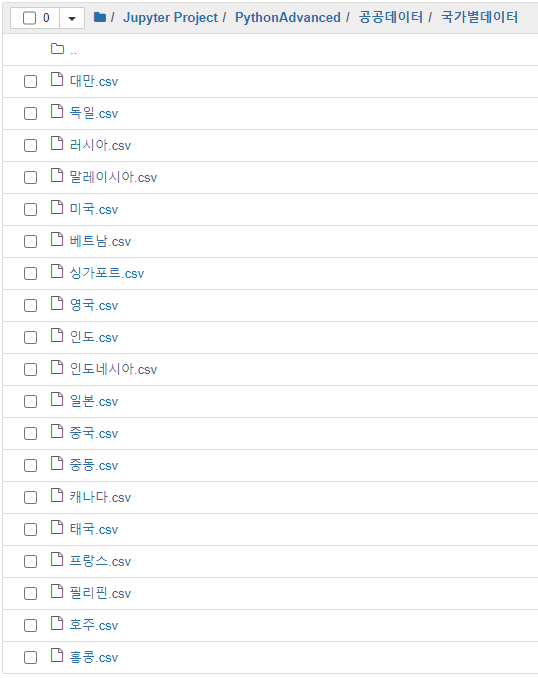

In [109]:
nlist = ftour['nat'].unique()

for item in nlist:
    ndata = ftour[ftour['nat']==item]
    ndata.to_csv('./공공데이터/국가별데이터/' + item + '.csv')

#### 006 외국 체류기간 분석

- 다음 보기와 같이 외국에서의 체류기간(period)을 산점도 그래프와 박스플롯으로 나타내세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
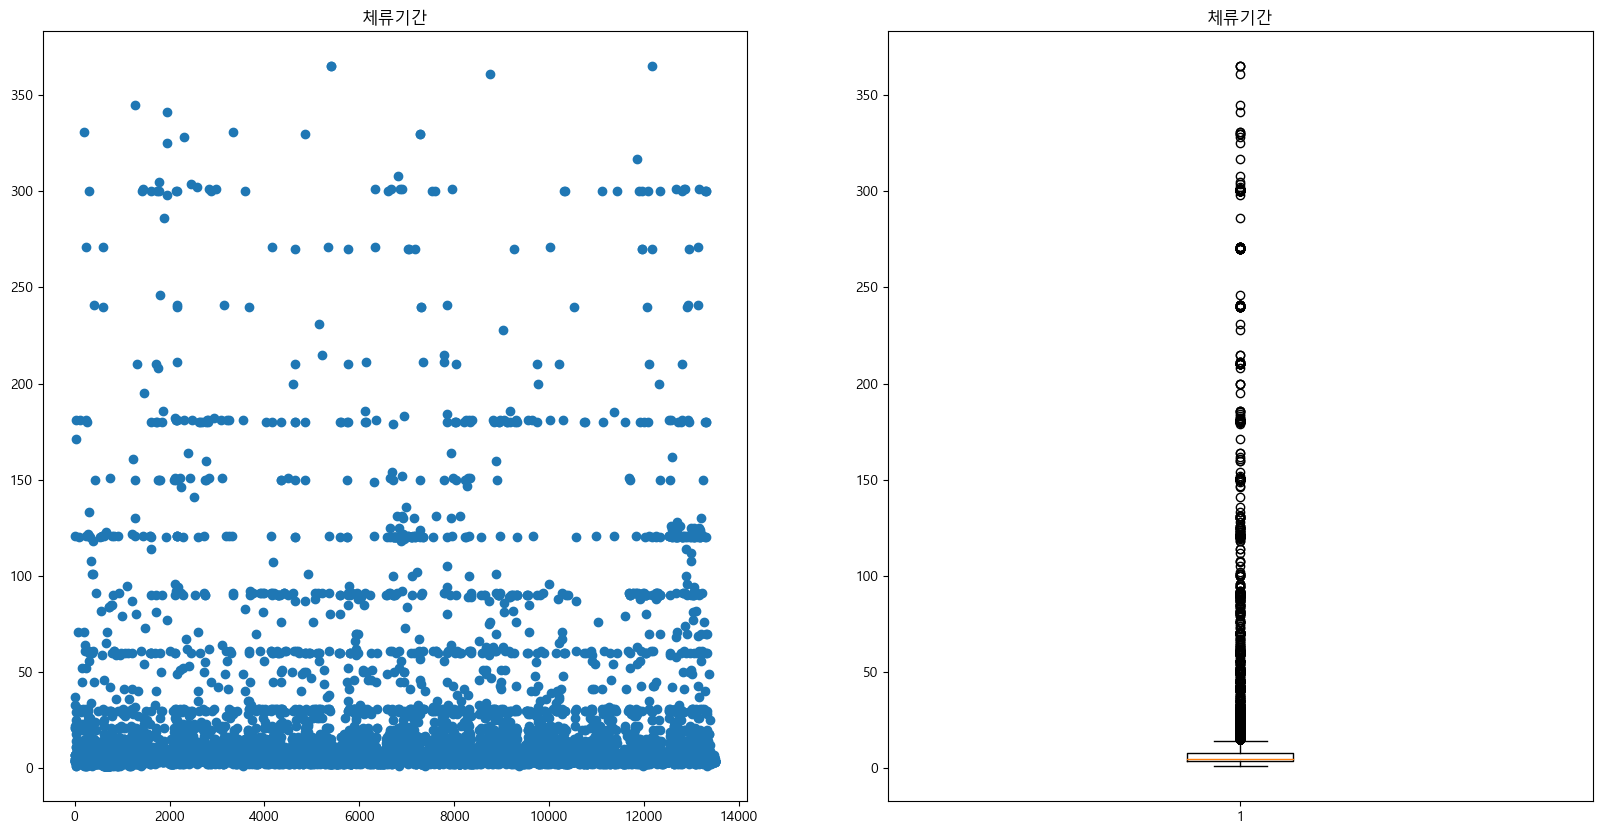

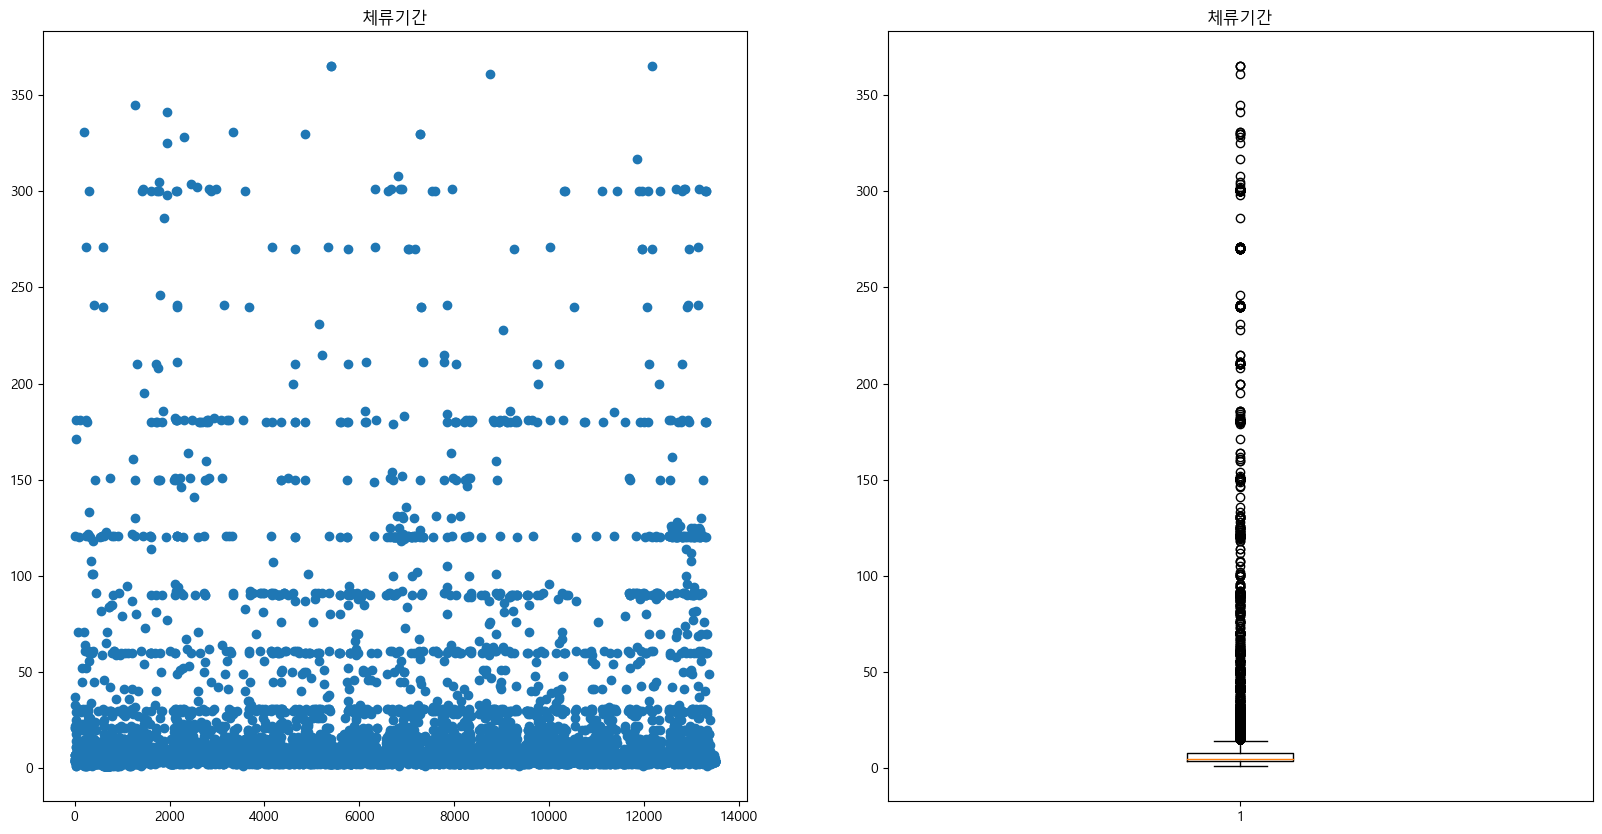

In [120]:
plt.figure(figsize=(20, 10)) 

plt.subplot(1,2,1)
plt.scatter(ftour.index, ftour['period'])
plt.title('체류기간')

plt.subplot(1,2,2)
plt.boxplot(ftour['period'])
plt.title('체류기간')

plt.show()

#### 007 멤버 현황 분석

- 다음 보기와 같이 멤버의 현황을 분석하세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
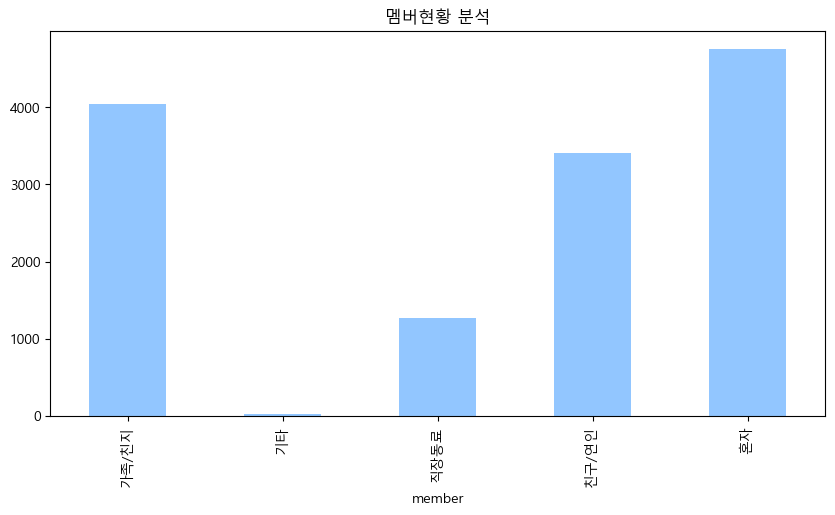

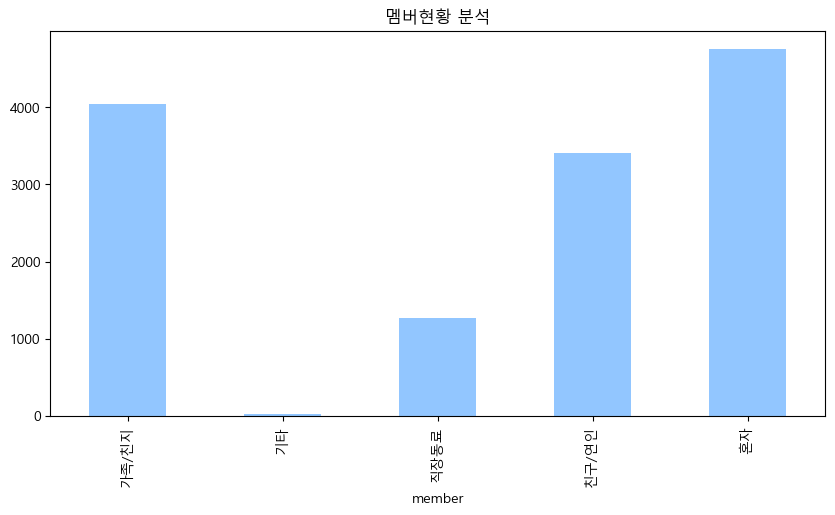

In [121]:
natmember = ftour.groupby('member').nat.count()

plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
natmember.plot(kind='bar')
plt.title('멤버현황 분석')
plt.show()

#### 008 국가별 방문자수

- 다음 보기와 같이 국가별 방문자수 현황을 분석하세요.
- 만든 그래프를 현재 경로에 ```국가별방문자수 막대그래프.png``` 이름으로 저장하세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
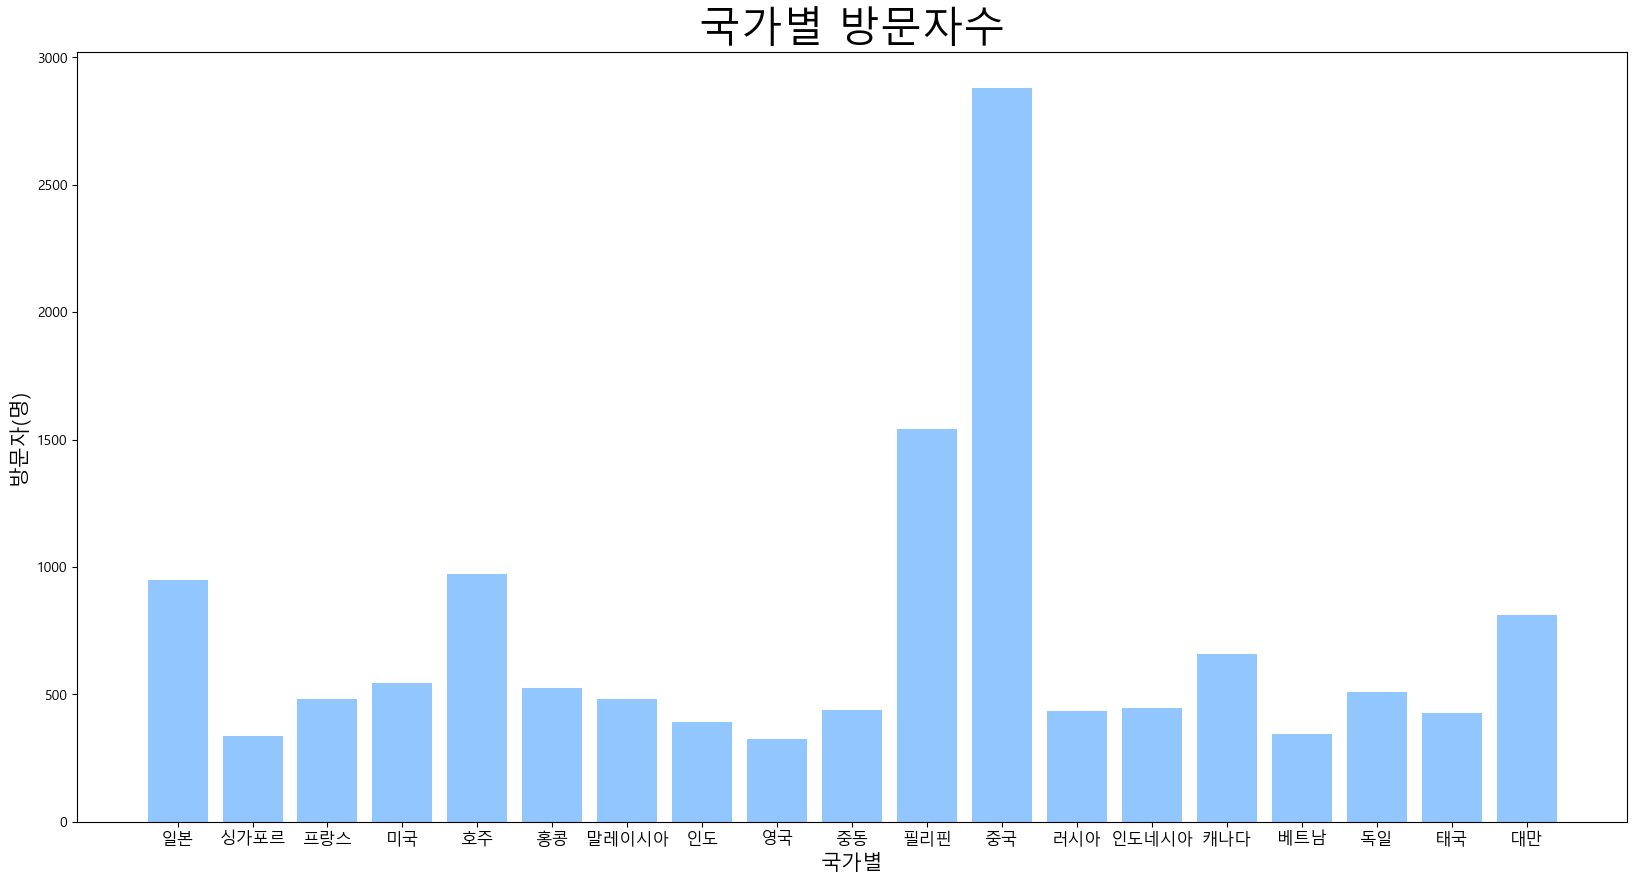

['일본' '싱가포르' '프랑스' '미국' '호주' '홍콩' '말레이시아' '인도' '영국' '중동' '필리핀' '중국' '러시아'
 '인도네시아' '캐나다' '베트남' '독일' '태국' '대만']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


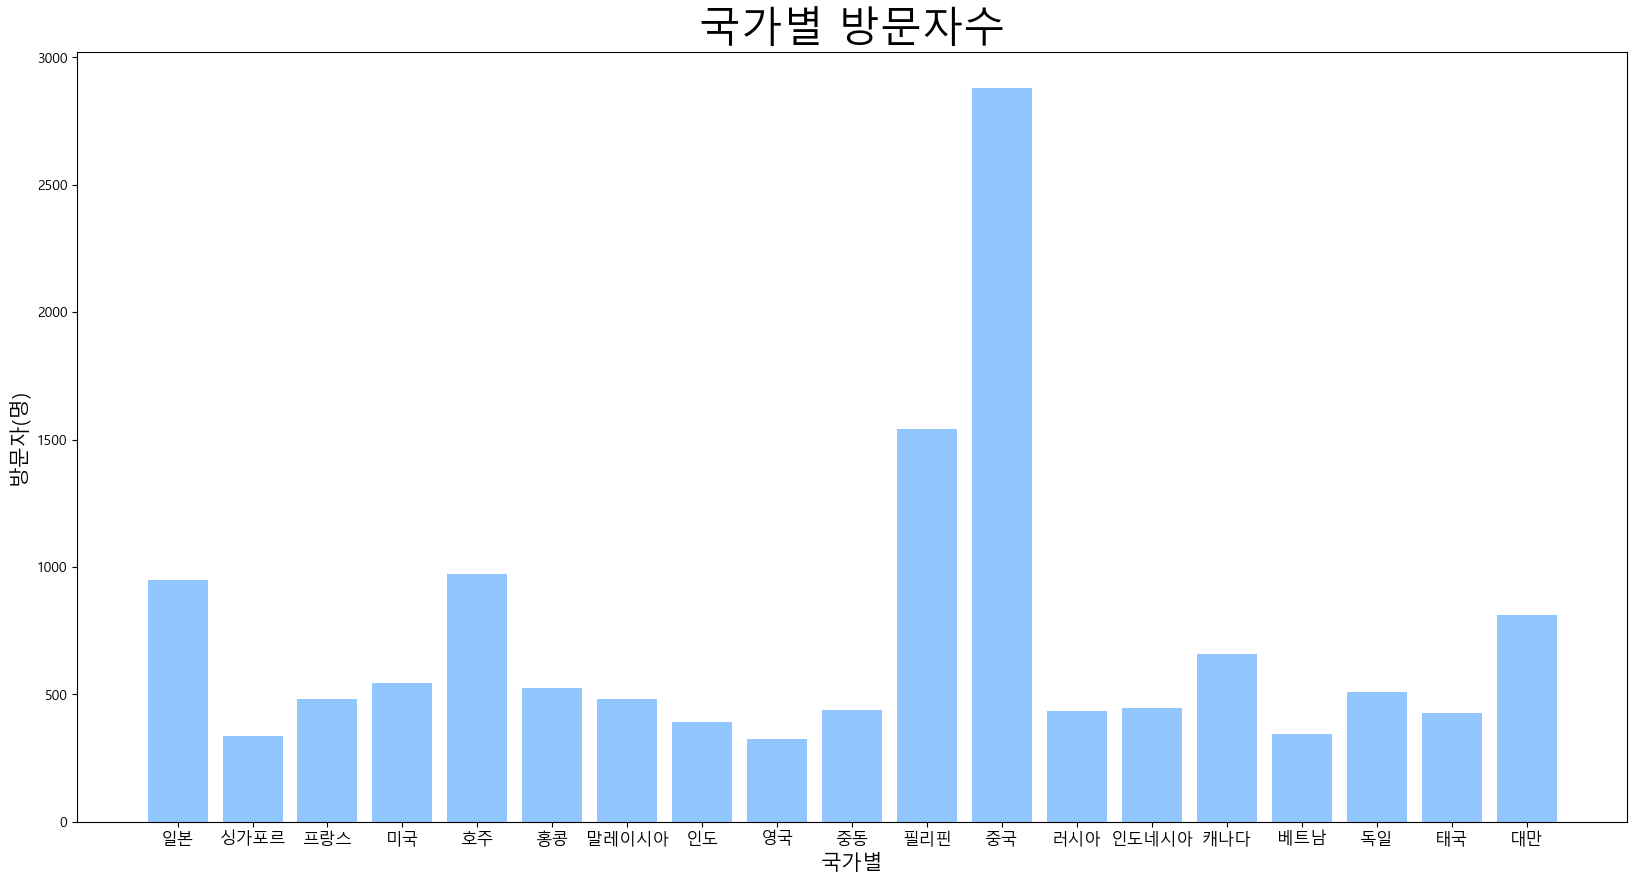

In [130]:
natcount = ftour.groupby('nat').nat.count()
label = ftour['nat'].unique()
index = np.arange(len(label))
# print(label)
# print(index)
plt.figure(figsize=(20,10))
plt.bar(index,natcount)
plt.title('국가별 방문자수',fontsize=30)
plt.xlabel('국가별',fontsize=15)
plt.ylabel('방문자(명)',fontsize=15)
plt.xticks(index,label,fontsize=12)
plt.savefig('국가별방문자수 막대그래프.png')
plt.show()

#### 009 국가별 멤버구성 시각화

- 다음 보기와 같이 국가별 멤버구성을 시각화 하세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
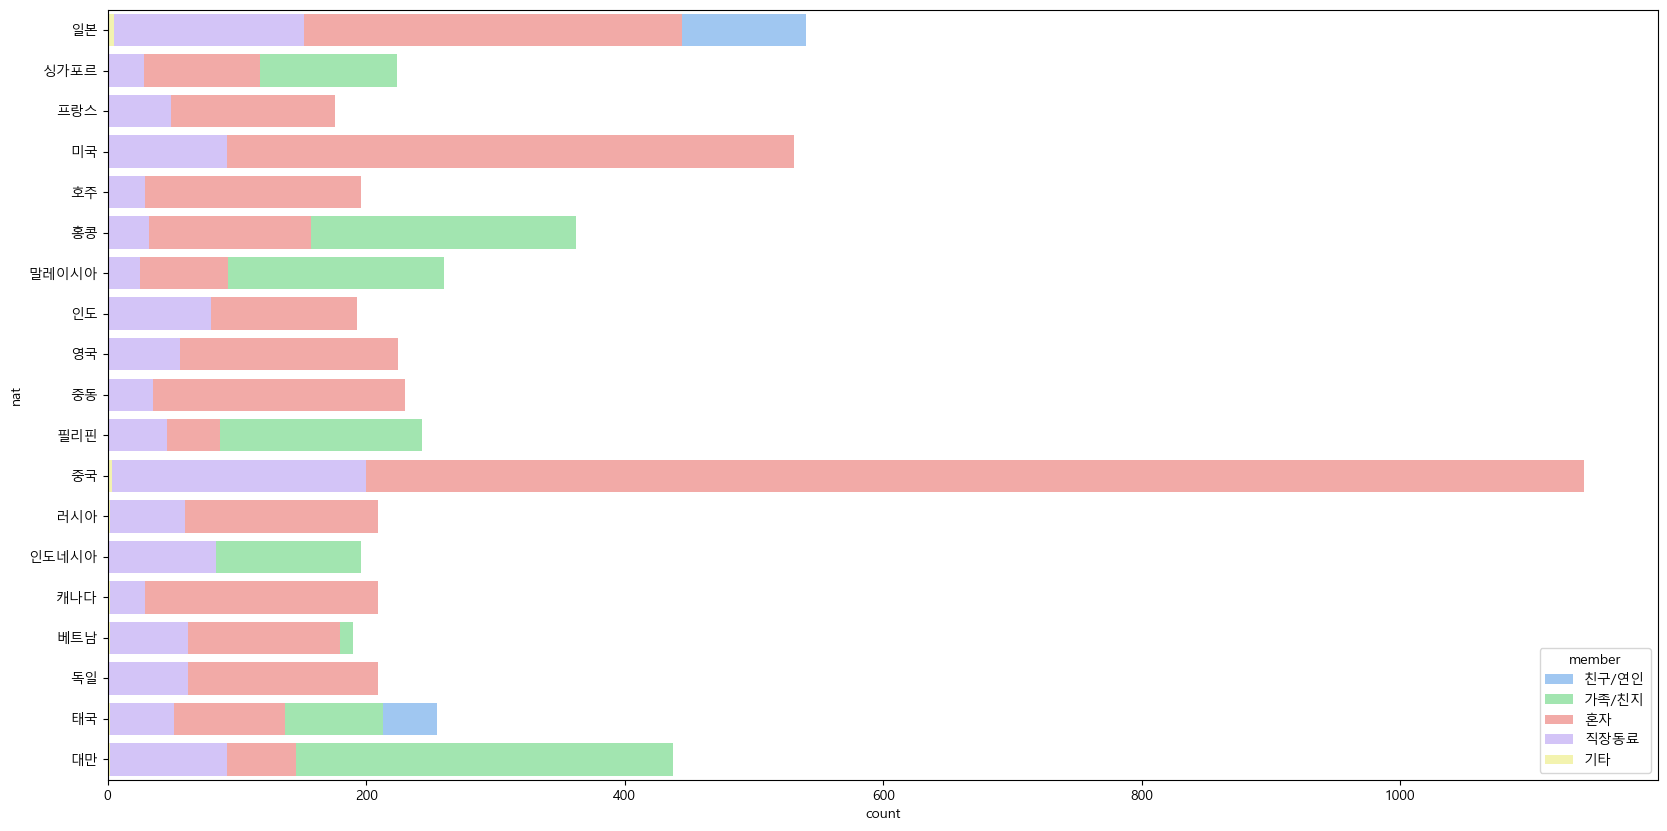

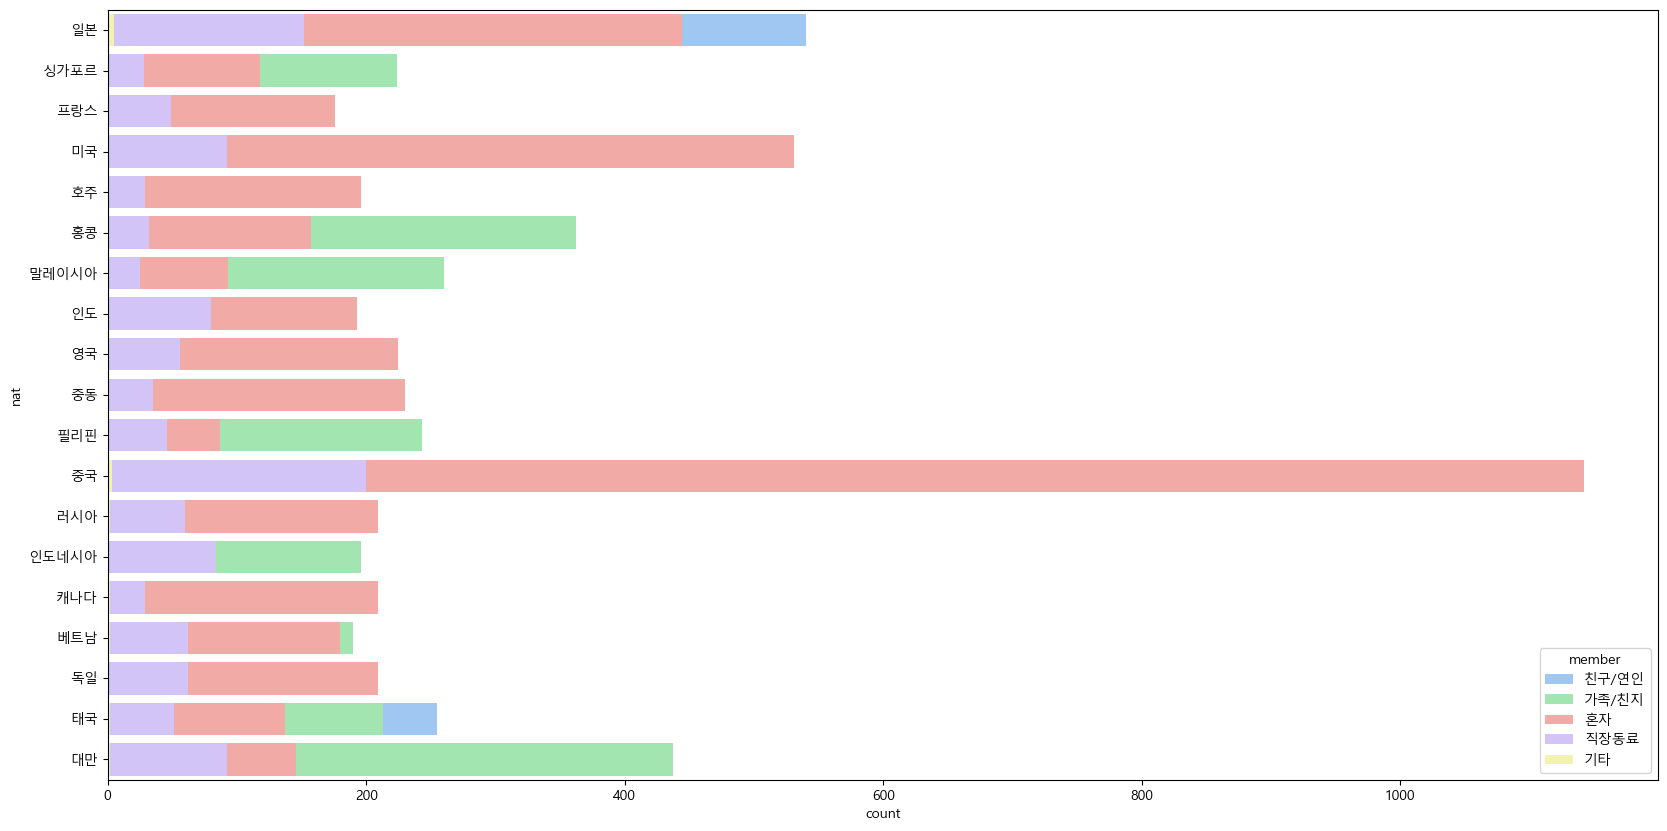

In [128]:
plt.figure(figsize=(20,10))
sns.countplot(y='nat' , hue='member' , dodge=False, data=ftour)
plt.show()

#### 010 국가별 만족한 활동 시각화

- 다음 보기와 같이 국가별 만족한 활동(bestact)을 시각화 하세요.

-------
<span style="font-weight:normal; color:orange;">Print</span>
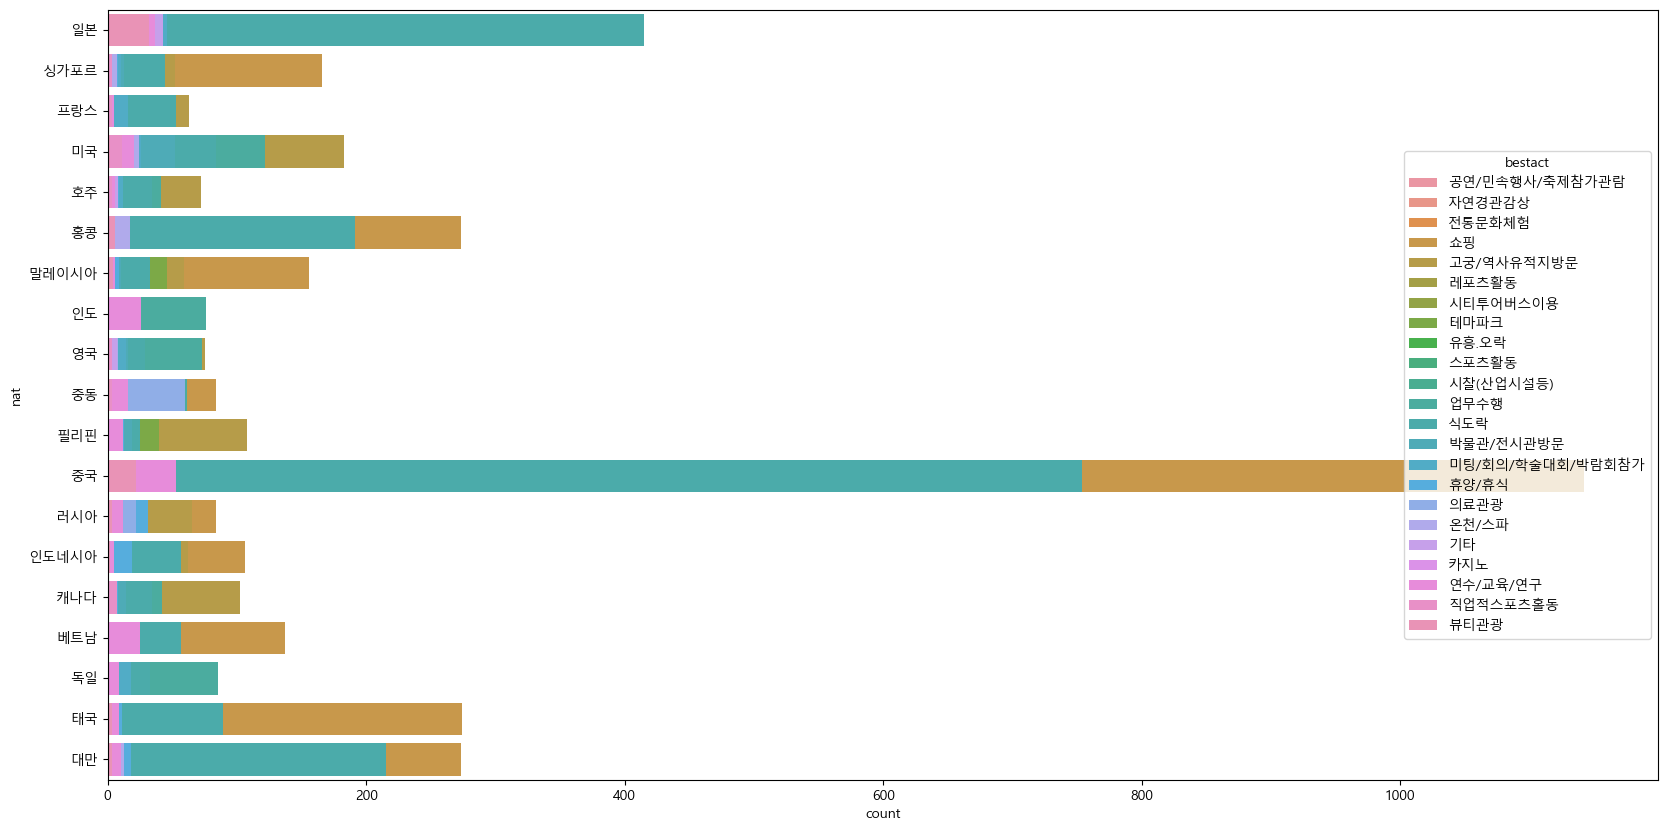

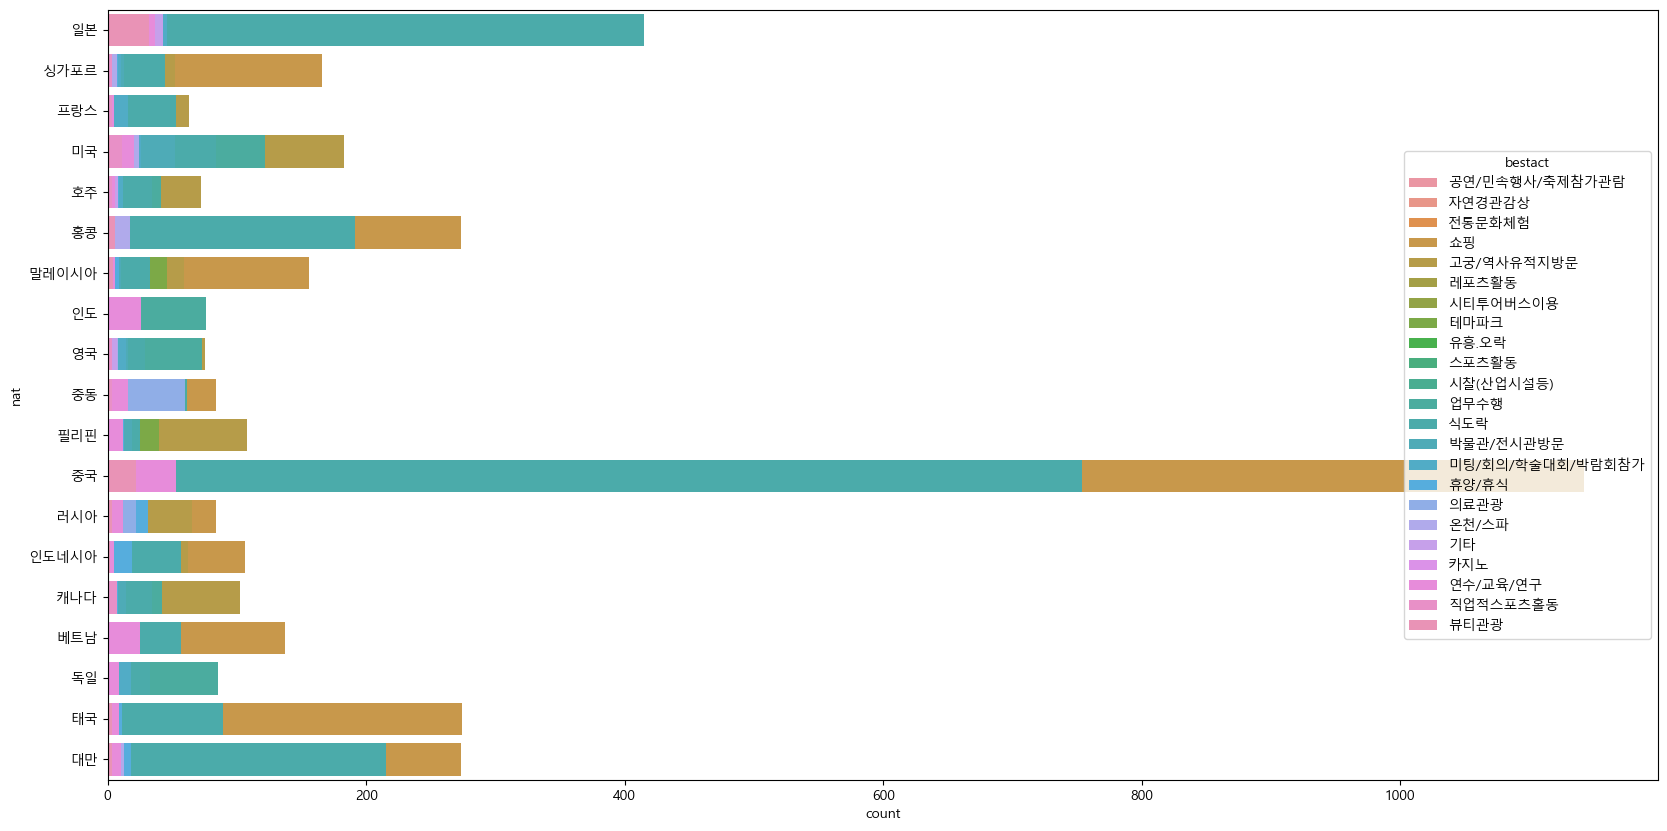

In [131]:
plt.figure(figsize=(20,10))
sns.countplot(y='nat' , hue='bestact' , dodge=False, data=ftour)
plt.show()